In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cowsay
import math

In [91]:
def ab_sr (x, y):
    sum_xy = 0
    for i in range(len(x)):
        sum_xy += x[i]*y[i]
    return sum_xy/len(x)
g = 9.80665
R = 8.31446262
def MNK_direct (x, y):
    sum_xy = ab_sr(x, y)
    sum_xx = ab_sr(x, x)
    sum_yy = ab_sr(y, y)
    k = sum_xy/sum_xx
    qk = (1/(len(x)**0.5))*(((sum_yy/sum_xx)-k**2)**0.5)
    return [k, qk]
def fx(x, k, b):
    return x*k+b
def MNK (x, y, pl = None, lab = None, color = None):
    '''
    Функция для нахождения коэфициентов мнк и их погрешностей
    y = kx + b
    [k, b, отн_погр_k, отн_погр_b, ]
    '''
    k = (ab_sr(x, y)-sum(x)/len(x)*sum(y)/len(y))/(ab_sr(x, x) - (sum(x)/len(x))**2)
    b = sum(y)/len(y) - k*sum(x)/len(x)
    qk = (1/len(x)**0.5)*((ab_sr(y, y)-(sum(y)/len(y))**2)/((ab_sr(x, x)-(sum(x)/len(x))**2))-k**2)**0.5
    qb = qk * (ab_sr(x, x)-(sum(x)/len(x))**2)**0.5
    dk_s = math.sqrt(((ab_sr(y, y) - (sum(y)/len(y))**2)/(ab_sr(x, x) - (sum(x)/len(x))**2))/(len(x)-2)) 
    if pl:
        pl.scatter(x, y, label = lab, marker='o', c = color)
        pl.plot ([x[0], x[len(x)-1]], [fx(x[0], k, b), fx(x[len(x)-1], k, b)], c = color)
    return [k, b, math.sqrt(abs(dk_s)**2 + abs(qk)**2), abs(qb), abs(dk_s), abs(qk)]

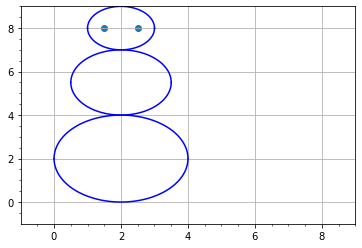

In [3]:
def add_rang(a, b, r):
    x = np.arange(a-r, a+r+0.0001, 0.0001)
    plt.plot(x, b+(r**2-(x-a)**2)**0.5, c = 'b')
    plt.plot(x, b-(r**2-(x-a)**2)**0.5, c = 'b')
add_rang(2, 2, 2)
add_rang(2, 5.5, 1.5)
add_rang(2, 8, 1)
plt.scatter([1.5, 2.5], [8, 8])
plt.minorticks_on()
plt.grid(which='major')
plt.ylim(-1, 9)
plt.xlim(-1, 9)
plt.show()

# лабораторная работа 2.2.3

In [4]:
def f(a):
    return list(map(float, a.replace(",", '.').split()))
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'lime']
t = {}
t['24'] = [f('13,30 13,09 13,00 13,03 12,90'), f('133,0 64,1 32,5 11,7 1,3')]
t['30'] = [f('13,40 13,30 13,30 13,23 13,20'), f('134,0 65,2 33,3 11,9 1,3')]
t['35'] = [f('13,60 13,47 13,40 13,37 13,30'), f('136,0 66,0 33,5 12,0 1,3')]
t['40'] = [f('13,85 13,63 13,58 13,53 13,50'), f('138,5 66,8 34,0 12,2 1,4')]
t['45'] = [f('14,0 13,8 13,8 13,7 13,7'), f('139,6 67,8 34,4 12,3 1,4')]
t['50'] = [f('14.1 14,0 13,9 13,9 13,9'), f('141 68,6 34,8 12,5 1,4')]
t['55'] = [f('14,5 14,2 14,1 14,1 14,1'), f('145,0 69,6 35,3 12,7 1,4')]
t['60'] = [f('14,6 14,4 14,3 14,2 14,2'), f('146,1 70,5 35,8 12,8 1,4')]

 343.01400813467495 -4432.615002271394 12.44507479981245 12.922548050956129
 663.7458194017942 -8769.386956572238 12.681474773834564 13.211965635392948
 469.6144949893471 -6256.223438716953 7.219258542906425 13.322040749314757
 394.43175921152425 -5320.791696942538 5.289808114872369 13.489764890076017
 442.50000000102676 -6055.400000014169 10.250233974702628 13.684519774011566
 611.3124999960204 -8482.262499944445 10.457903889371565 13.875493303342667
 321.3333333333302 -4510.133333333289 12.374566504707749 14.035684647302903
 346.39285714279396 -4913.953571427666 4.03005114157281 14.186070728941102


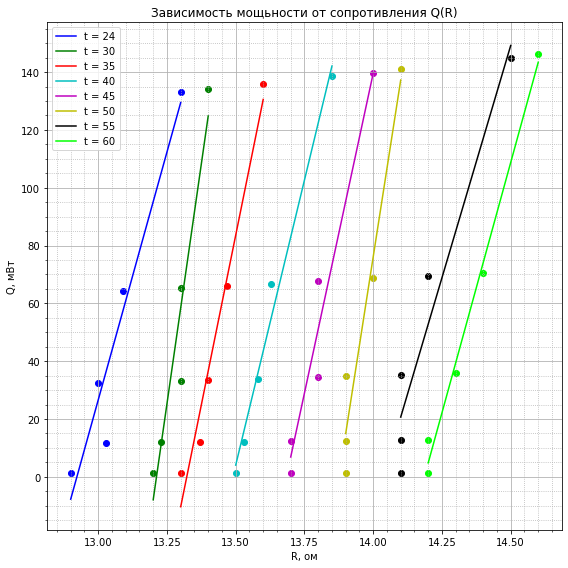

In [5]:
b = []
def f(x):
    a = MNK(x[0], x[1])
    print(f' {a[0]} {a[1]} {a[2]/a[0]*100} {-a[1]/a[0]}')
    b.append([a[0], a[1], a[2]/a[0]*100, -a[1]/a[0], a[2], a[3]])
    a = MNK(x[0], x[1])[0]*x[0][0]+MNK(x[0], x[1])[1]
    a2 = MNK(x[0], x[1])[0]*x[0][len(x[0])-1]+MNK(x[0], x[1])[1]
    return [a, a2]
key = list(t.keys())
plt.figure(figsize = (8, 8))
for i in range(len(key)):
    plt.scatter(t[key[i]][0], t[key[i]][1], c = color[i])
    plt.plot([t[key[i]][0][0], t[key[i]][0][4]], f(t[key[i]]), c = color[i], label='t = ' + key[i])
plt.title("Зависимость мощьности от сопротивления Q(R)")
plt.xlabel("R, ом")
plt.ylabel("Q, мВт")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

 0.034731786623801414 12.119251514233675 2.1247646482616775 -348.9383268849305


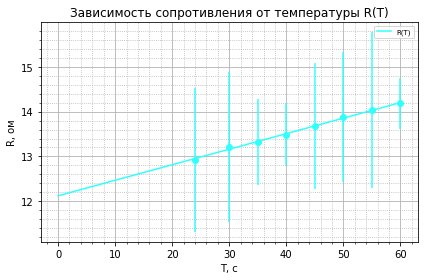

[0.034731786623801414,
 12.119251514233675,
 2.1247646482616775,
 -348.9383268849305,
 0.0007379687238922105,
 0.008597711735787054]

In [6]:
key_int = list(map(int, key))
R = [a[3] for a in b]
cf = MNK(key_int, R)
plt.errorbar(key_int, R, yerr = [a[3]*(((a[4]/a[0])**2 + (a[5]/a[1])**2)**0.5) for a in b], marker='o', linestyle='none', c = '#31fffe')
plt.plot([0, key_int[0], key_int[7]], [cf[1]]+f([key_int, R]), label='R(T)',c = '#31fffe')
plt.title("Зависимость сопротивления от температуры R(T)")
plt.xlabel("T, c")
plt.ylabel("R, ом")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()
b.pop()

In [7]:
k = []
err = []
l = 347
for i in range(8):
    g = b[i][0]*cf[0]*(1/(2*math.pi*l))*5.30
    err.append(g*((0.2/l)**2+(b[i][4]/b[i][0])**2+(b[i][5]/b[i][1])**2+(0.01/5)**2+(0.005/0.0275)**2)**0.5)
    k.append(g)
    print(f't = {key_int[i]}: k = {round(g, 4)}, \sigma_k = {round(g*((0.2/l)**2+(b[i][4]/b[i][0])**2+(b[i][5]/b[i][1])**2+(0.01/5)**2+(0.005/0.0275)**2)**0.5, 4)} \\\\')

t = 24: k = 0.029, \sigma_k = 0.0064 \\
t = 30: k = 0.056, \sigma_k = 0.0124 \\
t = 35: k = 0.0396, \sigma_k = 0.0078 \\
t = 40: k = 0.0333, \sigma_k = 0.0063 \\
t = 45: k = 0.0374, \sigma_k = 0.0078 \\
t = 50: k = 0.0516, \sigma_k = 0.0108 \\
t = 55: k = 0.0271, \sigma_k = 0.006 \\
t = 60: k = 0.0292, \sigma_k = 0.0054 \\


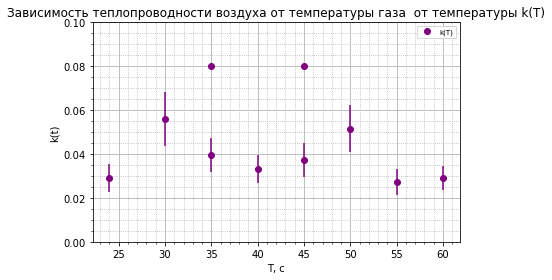

In [8]:
plt.errorbar(key_int + [35, 45], k + [0.08, 0.08], yerr = err + [0.001, 0.001], c = 'purple', label = 'k(T)', linestyle='none',  marker='o')
plt.title("Зависимость теплопроводности воздуха от температуры газа  от температуры k(T)")
plt.xlabel("T, c")
plt.ylabel("k(t)")
plt.minorticks_on()
plt.grid(which='major')
plt.ylim([0, 0.1])
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

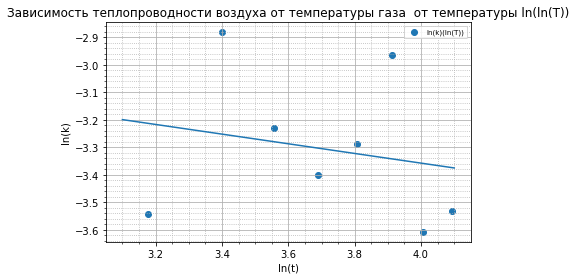

In [9]:
ln_k = [math.log(x) for x in k]
ln_t = [math.log(x) for x in key_int]
plt.scatter(ln_t, ln_k, label = 'ln(k)(ln(T))')
plt.plot([3.1, 4.1], [MNK(ln_t, ln_k)[0]*3.1+MNK(ln_t, ln_k)[1], MNK(ln_t, ln_k)[0]*4.1+MNK(ln_t, ln_k)[1]])
plt.title("Зависимость теплопроводности воздуха от температуры газа  от температуры ln(ln(T))")
plt.xlabel("ln(t)")
plt.ylabel("ln(k)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

# Лабораторная работа 2.2.6

In [25]:
t = {}
u0 = 0.00
t['20'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.050, 0.070, 0.090, 0.105, 0.126], 'k': 40.2}
t['30'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.052, 0.070, 0.084, 0.102, 0.122], 'k': 41.1}
t['50'] = {'p': [2, 2.5, 3, 3.5, 4],'u': [0.054, 0.068, 0.080, 0.096, 0.112], 'k': 42.9}

In [26]:
t['20']['u']

[0.05, 0.07, 0.09, 0.105, 0.126]

In [27]:
dt = {}
dt['20'] = [i*1000/t['20']['k'] for i in t['20']['u']]
dt['30'] = [i*1000/t['30']['k'] for i in t['30']['u']]
dt['50'] = [i*1000/t['50']['k'] for i in t['50']['u']]

In [37]:
d = '50'
p = 'p'
u = 'u'
for i in range(5):
    print (f'{t[d][p][i]} 0,05 {t[d][u][i]} 0,001 {round(dt[d][i], 2)} {round(dt[d][i]*0.001/t[d][u][i], 2)}'.replace('.', ','))

2 0,05 0,054 0,001 1,26 0,02
2,5 0,05 0,068 0,001 1,59 0,02
3 0,05 0,08 0,001 1,86 0,02
3,5 0,05 0,096 0,001 2,24 0,02
4 0,05 0,112 0,001 2,61 0,02


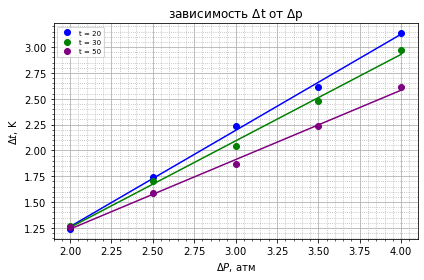

In [29]:
plt.errorbar(t['20']['p'], dt['20'],  label = 't = 20', linestyle='none',  marker='o', c = 'b')
plt.errorbar(t['30']['p'], dt['30'], label = 't = 30', linestyle='none',  marker='o', c = 'g')
plt.errorbar(t['50']['p'], dt['50'], label = 't = 50', linestyle='none',  marker='o', c = 'purple')
k = [MNK(t['20']['p'], dt['20']), MNK(t['30']['p'], dt['30']), MNK(t['50']['p'], dt['50'])]
plt.plot([2, 4], [k[0][0]*2 + k[0][1], k[0][0]*4 + k[0][1]], c = 'b')
plt.plot([2, 4], [k[1][0]*2 + k[1][1], k[1][0]*4 + k[1][1]], c = 'g')
plt.plot([2, 4], [k[2][0]*2 + k[2][1], k[2][0]*4 + k[2][1]], c = 'purple')
plt.title("зависимость $\Delta$t от $\Delta$p")
plt.ylabel("$\Delta t$, K")
plt.xlabel("$\Delta P$, атм")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 7)
plt.tight_layout()
plt.show()

# Лабораторная работа 2.5.1

In [4]:
t = {}
t[30] = [161, 162, 162, 161, 163]
t[35] = [163, 163, 164, 163, 163]
t[40] = [170, 169, 165, 164, 167]
t[45] = [165, ]
# спиздить у Олега # 

# Лабороторная работа 2.4.1

In [79]:
t = {}
t_min = 26
t_max = 40
t [26] = [2.5, 2.47]
t [27] = [2.655, 2.58]
t [28] = [2.76, 2.61]
t [29] = [3.025, 2.95]
t [30] = [3.19, 3.14]
t [31] = [3.325, 3.37]
t [32] = [3.47, 3.49]
t [33] = [3.66, 3.72]
t [34] = [3.74, 3.91]
t [35] = [4.05, 4.17]
t [36] = [4.255, 4.34]
t [37] = [4.533, 4.61]
t [38] = [4.78, 4.83]
t [39] = [5.04, 5.09]
t [40] = [5.34, 5.34]
# P = rg (dh)
r = 13596 * 0.01
p = [[r*g*t[a][0] for a in t], [r*g*t[a][1] for a in t]]

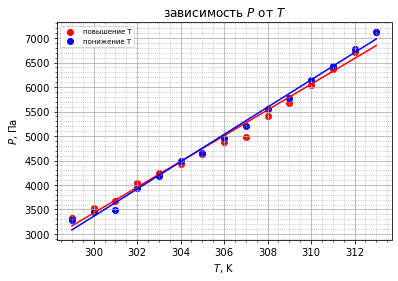

In [139]:
#def MNK (x, y, pl = None, lab = None, color = None):
#plt.errorbar(x, p[0],  label = 'повышение T', linestyle='none',  marker='o', c = 'b')
#plt.errorbar(x, p[1], label = 'понижение T', linestyle='none',  marker='o', c = 'g')

x = [x + 273 for x in t]
_, fig = plt.subplots()
k = []
k.append( MNK(x, p[0], fig, lab = 'повышение T', color = 'r'))
k.append( MNK(x, p[1], fig, lab = 'понижение T', color = 'b'))
fig.set_title("зависимость $P$ от $T$")
fig.set_ylabel("$P$, Па")
fig.set_xlabel("$T$, K")
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 7)
plt.show()

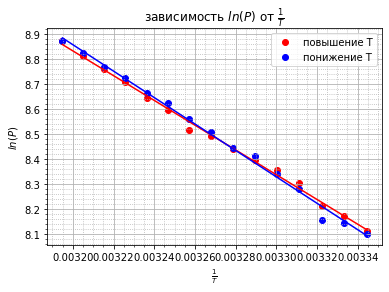

In [138]:
x = [1/(x + 273) for x in t]
_, fig = plt.subplots()
k1 = []
k1.append( MNK(x, [math.log(i) for i in p[0]], fig, lab = 'повышение T', color = 'r'))
k1.append( MNK(x, [math.log(i) for i in p[1]], fig, lab = 'понижение T', color = 'b'))
fig.set_title("зависимость $ln(P)$ от $\\frac{1}{T}$")
fig.set_ylabel("$ln(P)$")
fig.set_xlabel("$\\frac{1}{T}$")
fig.minorticks_on()
fig.grid(which='major')
fig.grid(which='minor', linestyle=':')
fig.legend(fontsize = 10)
plt.show()

In [135]:
for i in range(2):
    print(f'{(R*(310**2)/p[i][12])*k[i][0]/1000:.2f} {k[i][2]*(R*(310**2)/p[i][12])/1000:.2f}')

32.98 9.27
34.57 9.64


In [114]:
print(f" L_нагр = {(-k1[0][0]*R/1000)/18:.2f} ± {(k1[0][2]/1000)/18:.2f} Кдж/кг")
print(f" L_ост = {(-k1[1][0]*R/1000)/18:.2f} ± {(k1[1][2]/1000)/18:.2f} Кдж/кг")

 L_нагр = 2.29 ± 0.08 Кдж/кг
 L_ост = 2.45 ± 0.08 Кдж/кг


In [110]:
print(f" L_нагр = {-k1[0][0]*R/1000:.2f} ± {k1[0][2]/1000:.2f} Кдж/моль")
print(f" L_ост = {-k1[1][0]*R/1000:.2f} ± {k1[1][2]/1000:.2f} Кдж/моль")

 L_нагр = 41.28 ± 1.38 Кдж/моль
 L_ост = 44.07 ± 1.48 Кдж/моль


In [115]:
#return [k, b, math.sqrt(abs(dk_s)**2 + abs(qk)**2), abs(qb), abs(dk_s), abs(qk)]

In [137]:
for i in range(2):
    print(f'{k1[i][0]:.2f} {k1[i][1]:.2f} {k1[i][2]:.2f}')

-4965.41 24.72 1381.56
-5299.97 25.82 1477.27


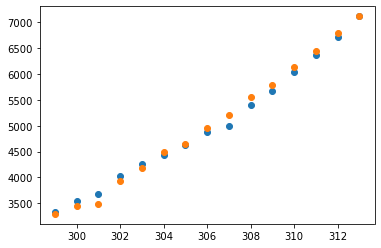

In [141]:
plt.scatter(x, p[0])
plt.scatter(x, p[1])